In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pychattr.channel_attribution import MarkovModel


In [4]:
# Load in our data
df = pd.read_csv("Channel_attribution.csv")

# Grab list of columns to iterate through
cols = df.columns



In [5]:
df

,R05A.01,R05A.02,R05A.03,R05A.04,R05A.05,R05A.06,R05A.07,R05A.08,R05A.09,R05A.10,...,R05A.12,R05A.13,R05A.14,R05A.15,R05A.16,R05A.17,R05A.18,R05A.19,R05A.20,Output
0,16,4,3.0,5.0,10.0,8.0,6.0,8.0,13.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,9.0,10.0,1.0,4.0,3.0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,13,20.0,16.0,15.0,21.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,15,20.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16,9,13.0,20.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,4,4,5.0,12.0,13.0,2.0,20.0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2388,9,16,17.0,15.0,20.0,21.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2389,10,6,5.0,4.0,2.0,9.0,20.0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,10,6,11.0,20.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cols

Index(['R05A.01', 'R05A.02', 'R05A.03', 'R05A.04', 'R05A.05', 'R05A.06',
       'R05A.07', 'R05A.08', 'R05A.09', 'R05A.10', 'R05A.11', 'R05A.12',
       'R05A.13', 'R05A.14', 'R05A.15', 'R05A.16', 'R05A.17', 'R05A.18',
       'R05A.19', 'R05A.20', 'Output'],
      dtype='object')

In [7]:
# Iterate through columns to change all ints to str and remove any trailing '.0'
for col in cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].map(lambda x: str(x)[:-2] if "." in x else str(x))


In [8]:
# Create a total path to conversion variable
df['Path'] = ''
for i in df.index:
    for x in cols:
        df.at[i, 'Path'] += df.at[i, x] + ' > '


In [10]:
# Split path on conversion (channel 21)
df["Path"] = df["Path"].map(lambda x: x.split(" > 21")[0])

# Create conversion value we can sum to get total conversions for each path
df["Conversion"] = 1

# Select relevant columns
df = df[["Path", "Conversion"]]

# Sum conversions by Path
df = df.groupby("Path").sum().reset_index()

# Write DF to CSV to be executed in R
df.to_csv("Paths.csv", index=False)

In [11]:

# Set parameters for the Markov Model
path_feature = "Path"
conversion_feature = "Conversion"
null_feature = None
separator = ">"
k_order = 1
n_simulations = 100000
max_steps = None
return_transition_probs = True
random_state = 26


In [12]:

# Instantiate the model
mm = MarkovModel(
    path_feature=path_feature,
    conversion_feature=conversion_feature,
    null_feature=null_feature,
    separator=separator,
    k_order=k_order,
    n_simulations=n_simulations,
    max_steps=max_steps,
    return_transition_probs=return_transition_probs,
    random_state=random_state
)

# Fit the Markov model
mm.fit(df)

# Save the simulation results
markov = mm.attribution_model_



In [14]:
mm.attribution_model_


,channel_name,total_conversions
0,1,71.587743
1,20,306.520378
2,12,71.468892
3,14,55.846627
4,13,153.114927
5,3,98.364367
6,17,71.649369
7,6,57.123172
8,8,54.600896
9,10,166.518646


In [15]:
print(mm.removal_effects_)


   channel_name  removal_effect
0             1         0.16263
1            20         0.69634
2            12         0.16236
3            14         0.12687
4            13         0.34784
5             3         0.22346
6            17         0.16277
7             6         0.12977
8             8         0.12404
9            10         0.37829
10           11         0.22002
11           16         0.28581
12            2         0.18626
13            4         0.38346
14            7         0.08636
15            5         0.15968
16            9         0.31223
17           15         0.13711
18           18         0.01233
19           19         0.03234


In [16]:
# Select only the necessary columns and rename them
markov.columns = ["Channel", "Conversion"]

In [17]:
# First Touch Attribution
df['First Touch'] = df['Path'].map(lambda x: x.split(' > ')[0])
df_ft = pd.DataFrame()
df_ft['Channel'] = df['First Touch']
df_ft['Attribution'] = 'First Touch'
df_ft['Conversion'] = 1
df_ft = df_ft.groupby(['Channel', 'Attribution']).sum().reset_index()

# Last Touch Attribution
df['Last Touch'] = df['Path'].map(lambda x: x.split(' > ')[-1])
df_lt = pd.DataFrame()
df_lt['Channel'] = df['Last Touch']
df_lt['Attribution'] = 'Last Touch'
df_lt['Conversion'] = 1
df_lt = df_lt.groupby(['Channel', 'Attribution']).sum().reset_index()

# Linear Attribution
channel = []
conversion = []
for i in df.index:
    for j in df.at[i, 'Path'].split(' > '):
        channel.append(j)
        conversion.append(1/len(df.at[i, 'Path'].split(' > ')))
lin_att_df = pd.DataFrame()
lin_att_df['Channel'] = channel
lin_att_df['Attribution'] = 'Linear'
lin_att_df['Conversion'] = conversion
lin_att_df = lin_att_df.groupby(['Channel', 'Attribution']).sum().reset_index()

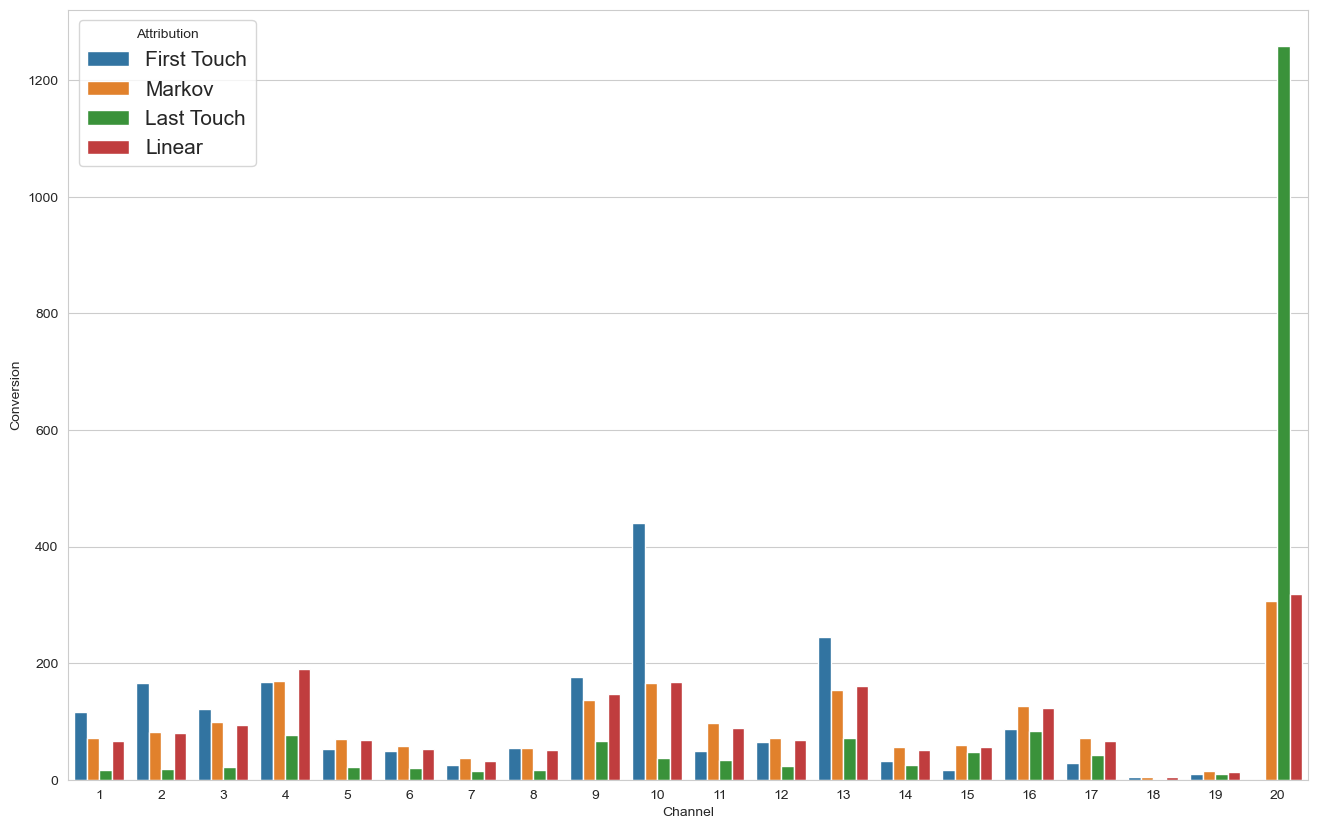

In [18]:

# Concatenate the four data frames to a single data frame
df_total_attr = pd.concat([df_ft, df_lt, lin_att_df, markov])
df_total_attr['Channel'] = df_total_attr['Channel'].astype(int)
df_total_attr.sort_values(by='Channel', ascending=True, inplace=True)
# Put the Markov References back in from faulty code earlier
import numpy as np
df_total_attr = df_total_attr.replace(np.nan, 'Markov', regex=True)

# Visualize the attributions
sns.set_style("whitegrid")
plt.rc('legend', fontsize=15)
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='Channel', y='Conversion', hue='Attribution', data=df_total_attr)
plt.show()

In [20]:
# Read in transition matrix CSV
trans_prob = pd.read_csv("Markov - Output - Transition matrix.csv")

# Convert data to floats
trans_prob["transition_probability"] = trans_prob["transition_probability"].astype(float)

# Convert start and conversion event to numeric values so we can sort
trans_prob.replace("(start)", "0", inplace=True)
trans_prob.replace("(conversion)", "21", inplace=True)

# Get unique origin channels
channel_from_unique = trans_prob["channel_from"].unique().tolist()
channel_from_unique.sort(key=float)

# Get unique destination channels
channel_to_unique = trans_prob["channel_to"].unique().tolist()
channel_to_unique.sort(key=float)

# Create new matrix with origin and destination channels as columns
trans_matrix = pd.DataFrame(columns=channel_to_unique, index=channel_from_unique)


In [21]:

# Assign the probabilities to the corresponding cells in our transition matrix
for f in channel_from_unique:
    for t in channel_to_unique:
        x = trans_prob[(trans_prob["channel_from"] == f) & (trans_prob["channel_to"] == t)]
        prob = x["transition_probability"].values
        if prob.size > 0:
            trans_matrix.at[f, t] = prob[0]
        else:
            trans_matrix.at[f, t] = 0



In [22]:
# Convert all probabilities to floats
trans_matrix = trans_matrix.apply(pd.to_numeric)

# Rename our start and conversion events
trans_matrix.rename(index={"0": "Start"}, inplace=True)
trans_matrix.rename(columns={"21": "Conversion"}, inplace=True)


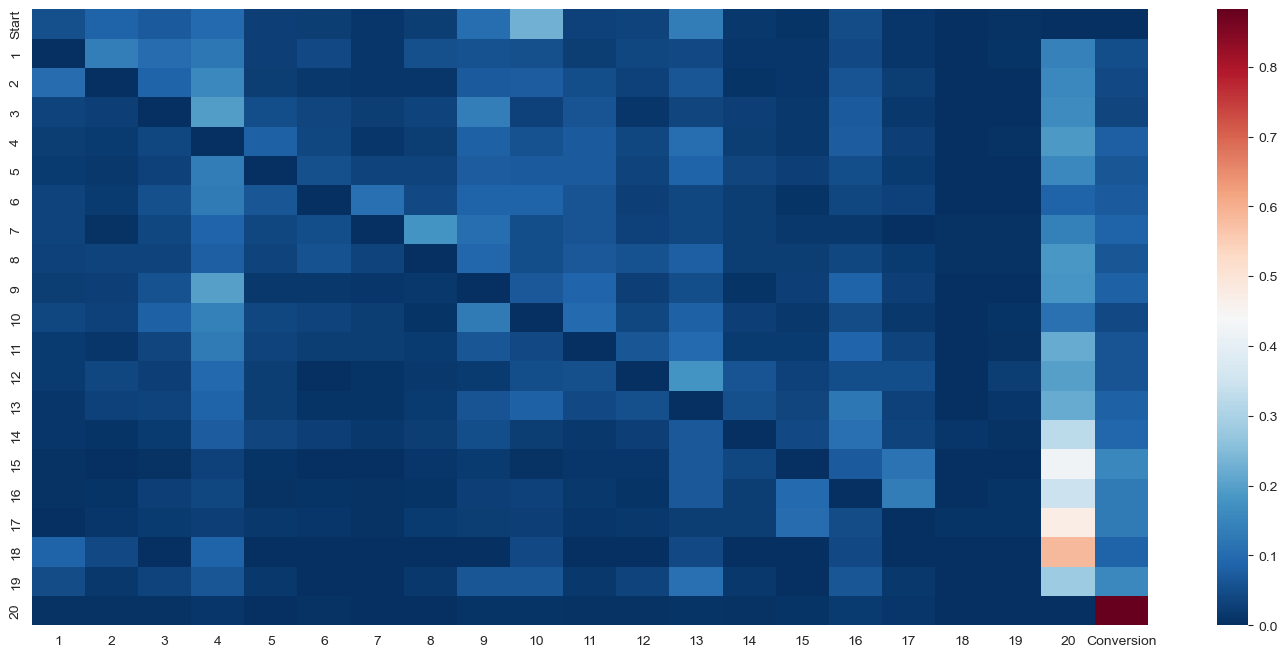

In [23]:

# Visualize this transition matrix in a heatmap
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(trans_matrix, cmap="RdBu_r")
plt.show()

In [26]:
from matplotlib.ticker import MaxNLocator
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline